In [178]:
import os
from os import path
from pathlib import Path
import pandas as pd
import numpy as np
import re
import glob

In [182]:
with open(r'data\xw.txt', 'r', encoding="utf8") as file:
    data = file.read().replace('\n', '')

In [183]:
data
data1 = data
data1[:333]

'果丹皮·室火猪·天蓬(UBC, Wen Xie): 对对是！Jr. Olyvia: 以前听你说不按credit算？果丹皮·室火猪·天蓬(UBC, Wen Xie): 因为我觉得好多prerequisite我不一定满足Jr. Olyvia: cs110果丹皮·室火猪·天蓬(UBC, Wen Xie): 对，但我忘跟你说没说过了确实是Jr. Olyvia: 一个term2个够了 太多不行果丹皮·室火猪·天蓬 (UBC, Wen Xie): 你要多选课嘛Jr. Olyvia: hhh可能不 我有事Jr. Olyvia: Unclassified student 要交学杂费吗果丹皮·室火猪·天蓬 (UBC, Wen Xie): 选个food science的果丹皮·'

In [161]:
# data1.split('Jr')
raw = re.split(":|Jr. Olyvia|果丹皮·室火猪·天蓬|\(UBC, Wen Xie\)", data1)
raw[:5]

['', '', '', ' 对对是！', '']

In [168]:
df = pd.DataFrame({"block": np.arange(1, len(raw)+1), "txt": raw})
df.txt = df.txt.replace(['', ' '], np.nan)
df = df.dropna()
strings = df.txt.tolist()
strings

[' 对对是！',
 ' 以前听你说不按credit算？',
 ' 因为我觉得好多prerequisite我不一定满足',
 ' cs110',
 ' 对，但我忘跟你说没说过了确实是',
 ' 一个term2个够了 太多不行',
 ' 你要多选课嘛',
 ' hhh可能不 我有事',
 ' Unclassified student 要交学杂费吗',
 ' 选个food science的',
 ' 不知道',
 ' 不用了',
 ' 选个MFS的！HACCP! food laws and regulations!',
 ' 可以报个math221 如果需要',
 ' For u',
 ' 对啊！你有什么推荐的不',
 ' 这课比较好？',
 ' Nvm. I thought it’s a popular prereq. Then turns out not ',
 ' 看你后期bridging model有啥想法吧',
 ' 如果你不想多上，拿fnh估计也算？ idk',
 ' 噢噢好的我看看',
 ' fnh算了，当时读food sci的时候都往外边选',
 ' 哦哦哦这意思！',
 ' 当然你也能多上别的hhh',
 ' 因为bridging model要300level likely need prereq ',
 ' 可能??比较懂hhh',
 ' 对对，??',
 ' 似乎很玄妙',
 ' 戴着口罩上',
 ' 估计肯定要求',
 ' In person FNH lab ?? ',
 ' 估计是不是戴着口罩',
 ' 是吧',
 ' Patricia孩子生了么',
 ' idk',
 ' 主要是那个课如果不上基本就什么都没了',
 ' 所以不能不上',
 ' 如果是有授课部分又有实验部分的，舍弃实验还说得过去',
 ' 一个food science的学生连大三lab都没做，真不行',
 ' 要不如果时间 我也考虑下undergrad courses?',
 ' 又当同学hhh',
 ' 噢噢噢',
 ' 夯实一下基础',
 ' 好想你跟我说过',
 ' 好像',
 ' 没事 你也不用知道这些',
 ' 噢，在放假',
 ' 就这两天hh',
 ' 原来你是这么想的',
 ' 你要去coop吧',
 ' 那估计2年多？',
 ' ??也2年多吗',
 ' 如果

In [166]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
from PIL import Image

In [170]:
res = []
for string in strings:
    string = string.strip()
    seg_list = jieba.cut(string)
    res+=list(seg_list)
#     print("Defualt Mode: " + '|'.join(list(seg_list)))
res[:11]

['对', '对', '是', '！', '以前', '听', '你', '说', '不', '按', 'credit']

In [174]:
import stopwordsiso
from stopwordsiso import stopwords
all_stops = stopwords(['zh'])
all_stops
# mystops = ['Jr', 'Olyvia', 'UBC', 'Wen', 'Xie', '果丹皮','室', '火猪','天蓬']
# for w in mystops:
#     all_stops = all_stops.add(w)
res_nstp = [w for w in res if not w in all_stops]
res_nstp = [w for w in res_nstp if w != " "]
res_nstp;

In [194]:
# indicate the font path that can display Chinese
font_path = 'fonts/HanyiSentyBubbleTea.ttf'
d=os.getcwd()
d
mask = np.array(Image.open(path.join(d, r'imgs/bbt.jpg')))
# mask
# create coloring from image
image_colors = ImageColorGenerator(mask)


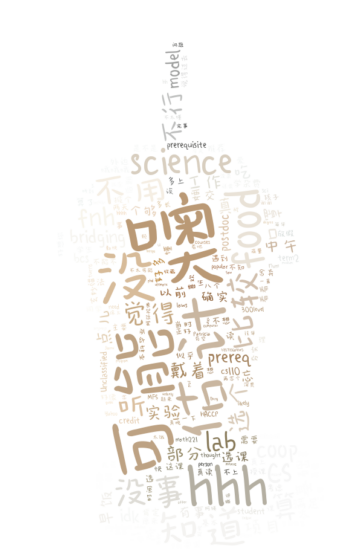

In [195]:
wc = WordCloud(font_path = font_path, mask=mask,
               background_color='white').generate(" ".join(res_nstp))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()